<a href="https://colab.research.google.com/github/pawel045/House_price_prediction/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis of apartment prices based on dataset from kaggle. For better readability, it is divided into three parts: data analysis, feature engineering, modeling. 

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Data analysis
* load data
* check nan values
* split for numerical and categorcial data
* histogram detection of useless data
* correlation detection of useless data

In [63]:
ds_train = pd.read_csv("/content/drive/MyDrive/ML/Kaggle's challenges/house prices/train.csv")
ds_test = pd.read_csv("/content/drive/MyDrive/ML/Kaggle's challenges/house prices/test.csv")

ds_train['train_test'] = 1
ds_test['train_test'] = 0
ds_all = pd.concat([ds_train, ds_test])

ds_all.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [64]:
ds_all.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train_test
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890,0.500171
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883,0.500086
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000,0.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000,1.000000


In [65]:
ds_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [66]:
# most of hosues dont have pool, it's useless data

ds_all = ds_all.drop([
    'Id', 
    'PoolQC', 
    'PoolArea'], 
    axis=1)

In [67]:
# split on numeric and categorical features

num_features = ds_all.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_features = ds_all.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
len(cat_features)

42

Histograms were used to check the relevance of data.

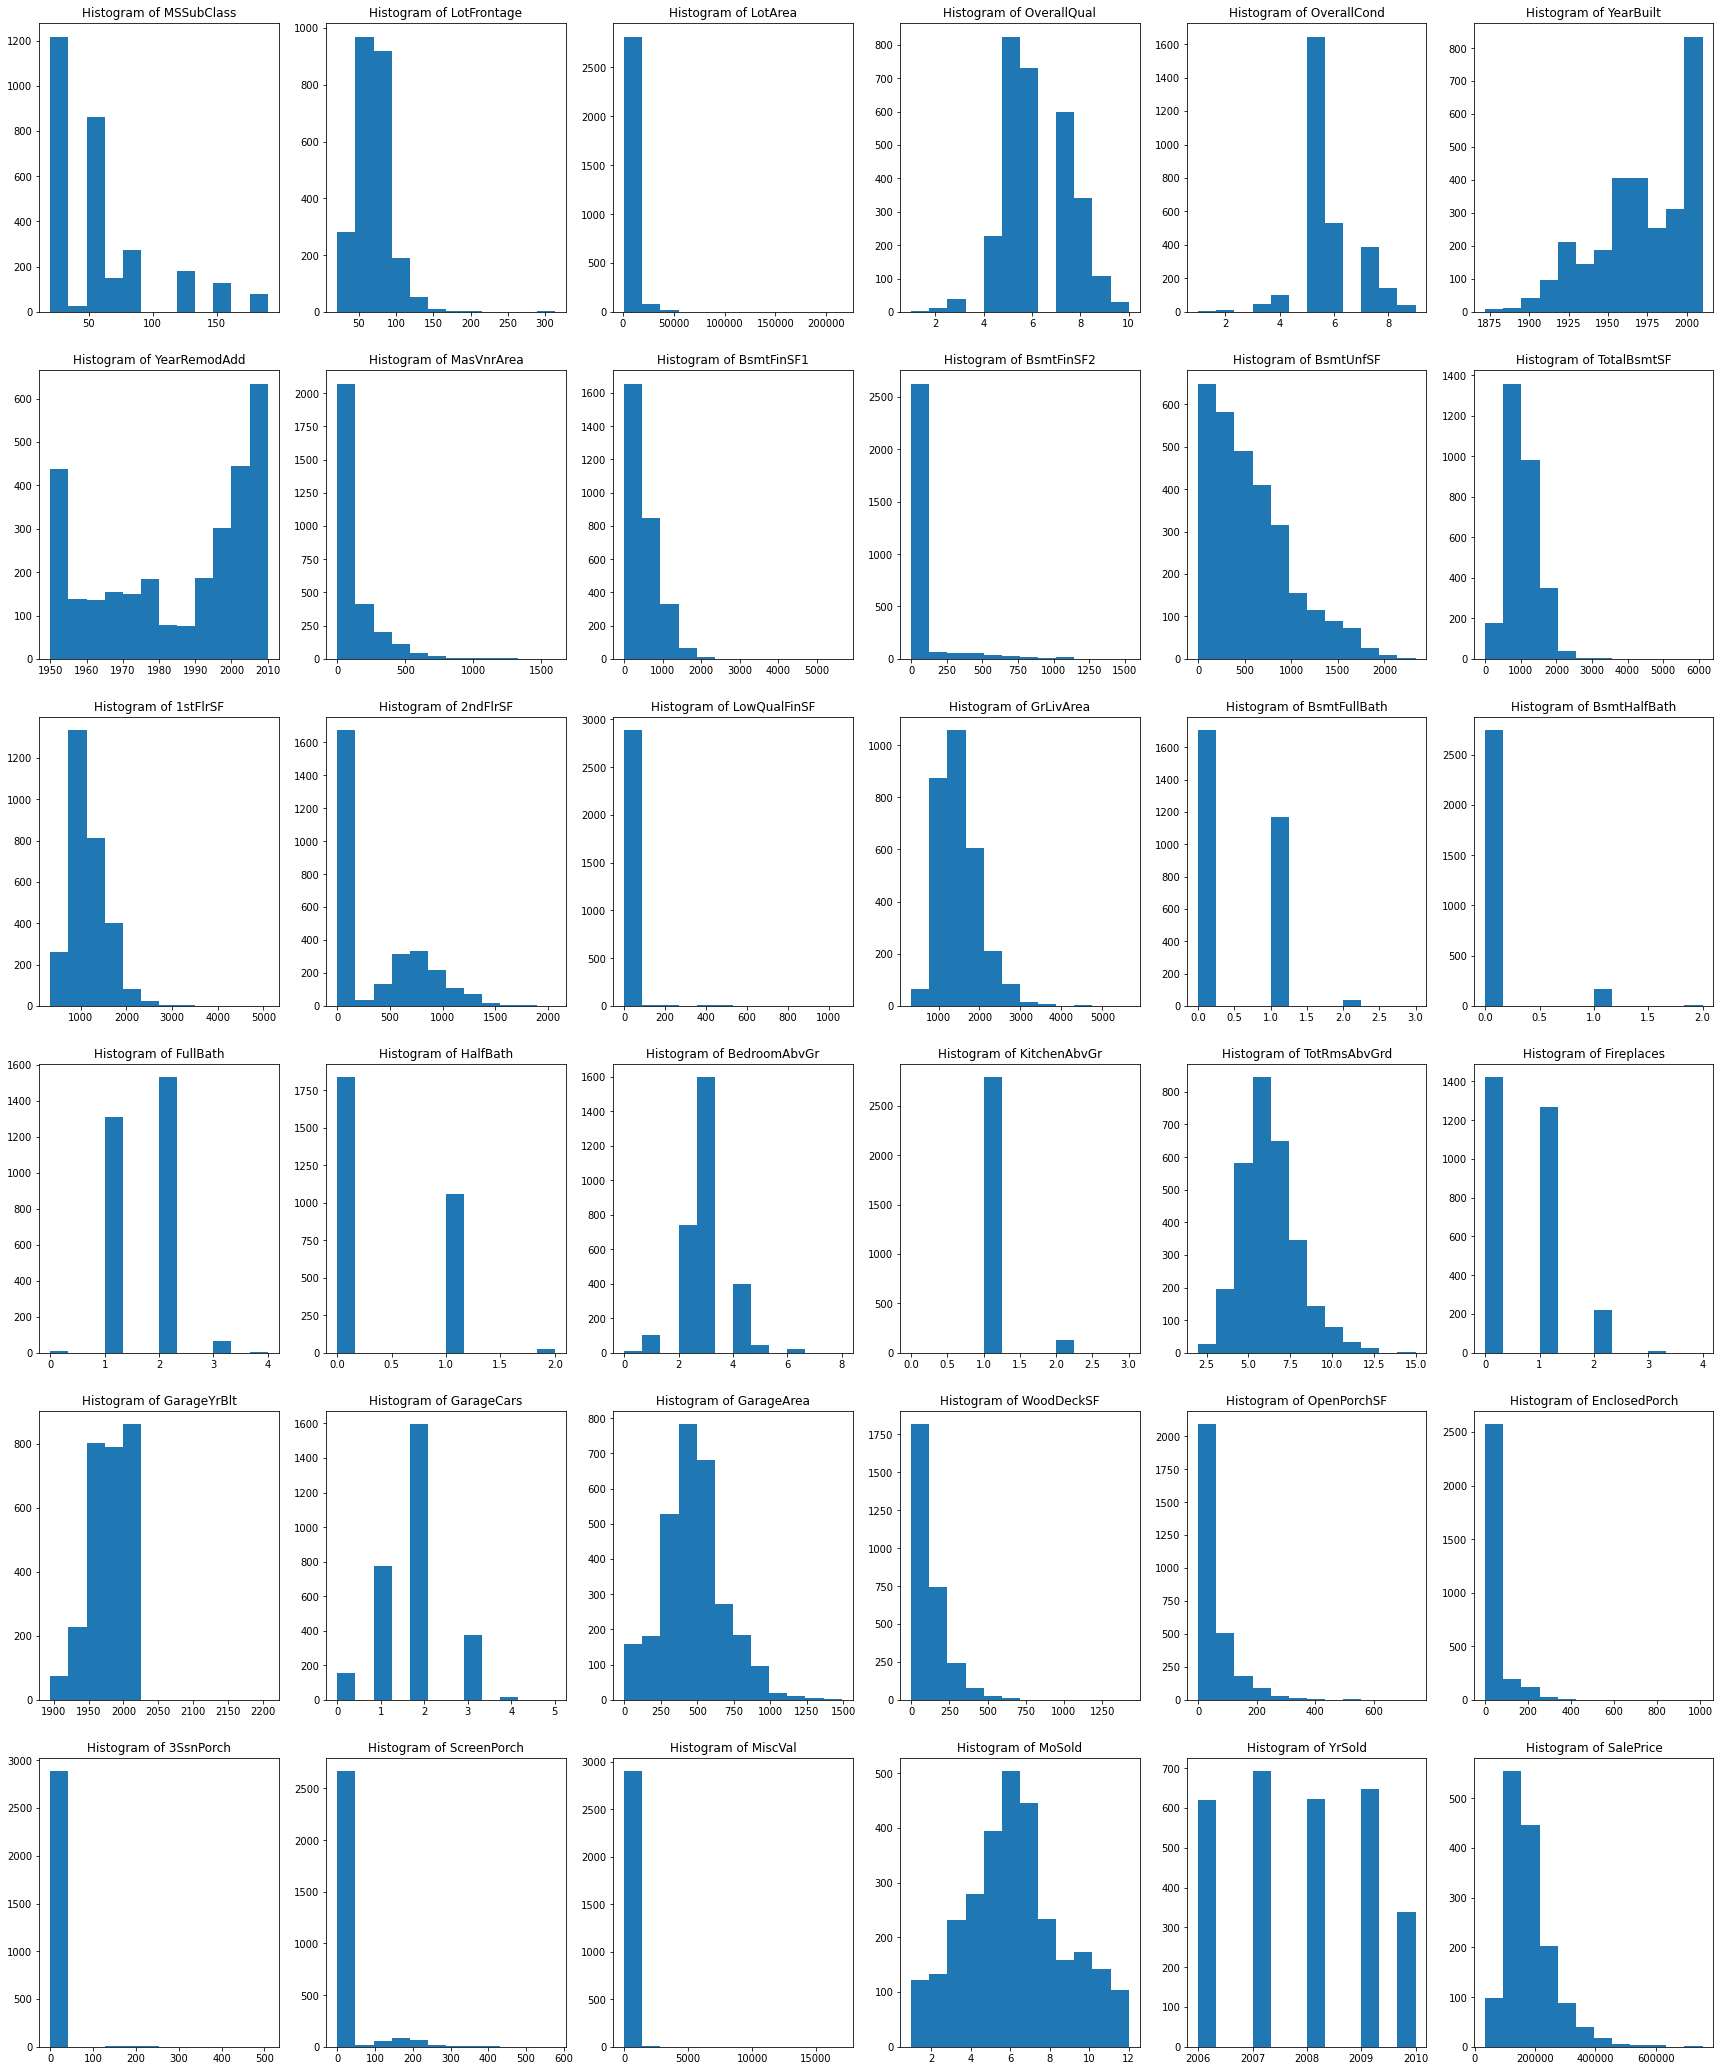

In [68]:
plt.figure(figsize=(30,50))
col_count = 1

for col in num_features[:36]:
    plt.subplot(8, 6, col_count)
    plt.hist(x=ds_all[col], bins=12)
    col_count += 1
    plt.title(f'Histogram of {col}')

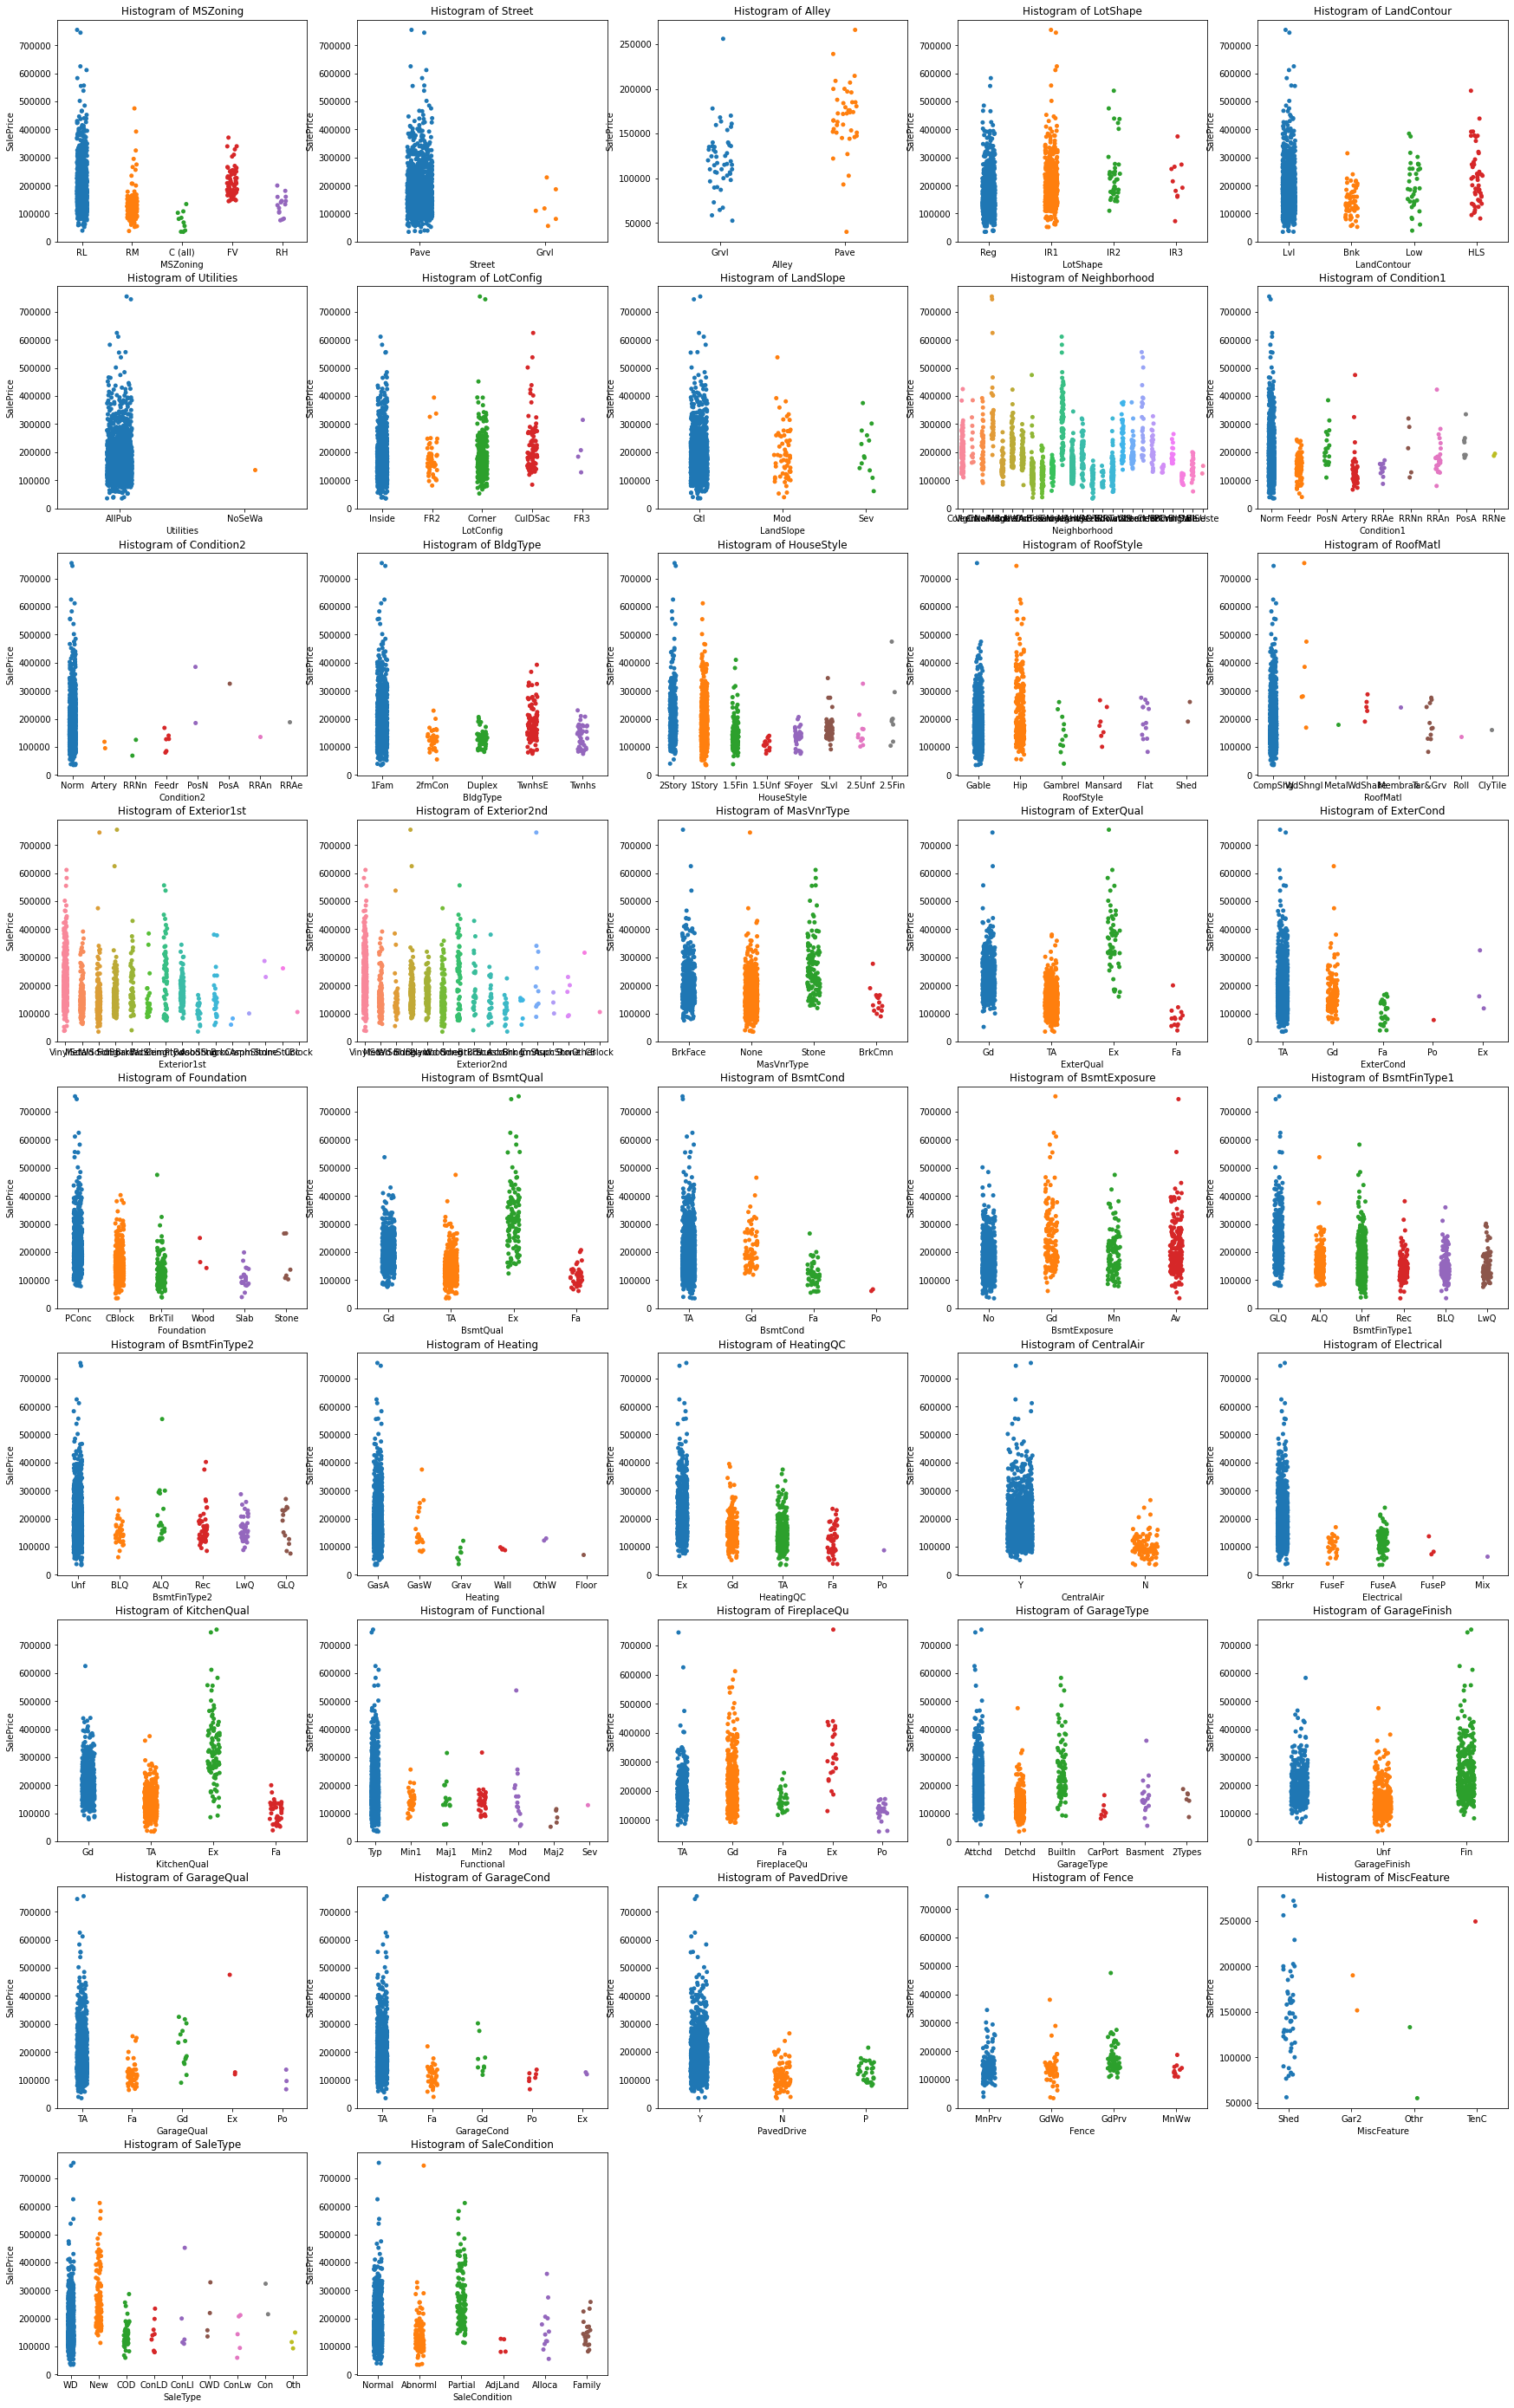

In [69]:
plt.figure(figsize=(30,50))
col_count = 1

for col in cat_features:
    plt.subplot(9, 5, col_count)
    sns.stripplot(data=ds_all, x=col, y='SalePrice')
    col_count += 1
    plt.title(f'Histogram of {col}')

The columns selected below removed, because they are 
too homogeneous and do not give much information.

In [70]:
num_to_drop = ['LowQualFinSF', '3SsnPorch', 'BsmtFinSF2', 'ScreenPorch', 'MiscVal', 'BsmtHalfBath', 'EnclosedPorch']
cat_to_drop = ['Street', 'Condition2', 'MiscFeature', 'Heating', 'Utilities', 'RoofMatl']

ds_all = ds_all.drop(num_to_drop, axis=1)
ds_all = ds_all.drop(cat_to_drop, axis=1)

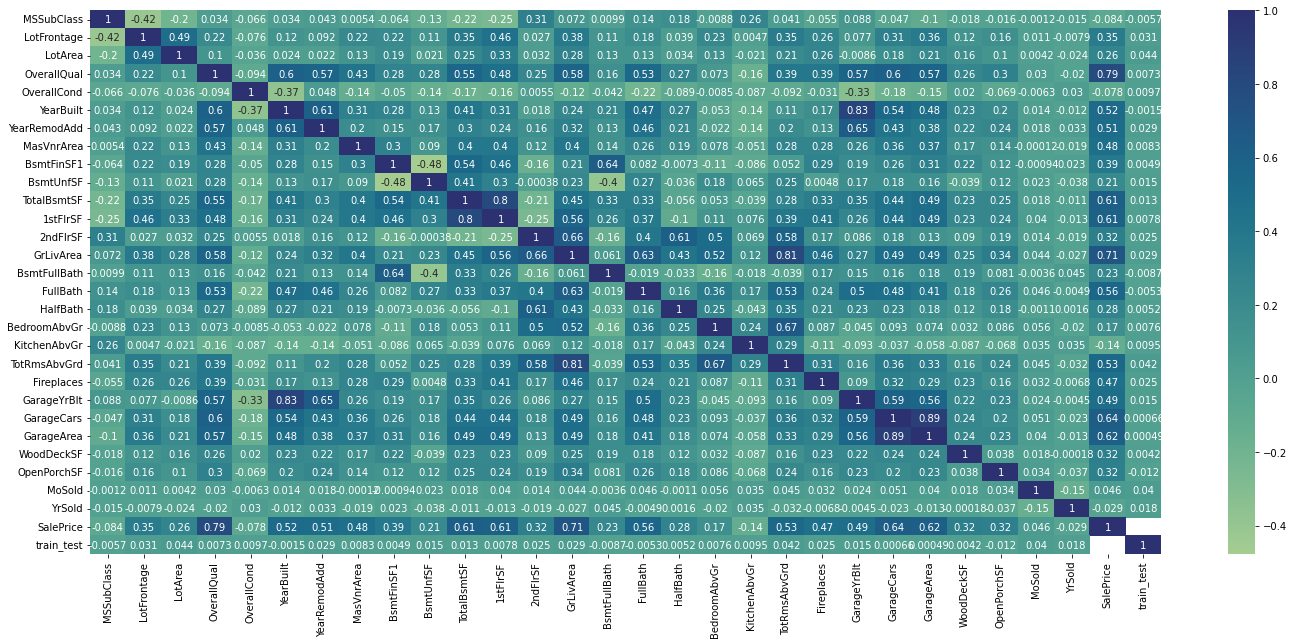

In [71]:
fig, ax = plt.subplots(figsize=(24,10)) 
corr = ds_all.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="crest", 
            annot=True)

The columns selected below removed, because they have weak correlation with SalePrice. 

Weak correlation -> (-0.2, 0.2)

In [72]:
weak_corr = ['MSSubClass', 'OverallCond', 'KitchenAbvGr', 'MoSold', 'YrSold', 'BedroomAbvGr'] # weak correlation -> (-0.2, 0.2)
ds_all = ds_all.drop(weak_corr, axis=1)

### Feature engineering
* fill missing values
* encode categorical values into numerical
* scale values
* split into test/train

In [82]:
ds_all

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,Fence,SaleType,SaleCondition,SalePrice,train_test
0,-0.042157,-0.202068,-0.217879,-0.165696,0.746669,0.316671,0.588555,-0.21626,-1.248476,-0.046258,...,0.233534,0.18646,0.31503,-0.740760,0.200006,0.263432,0.319311,0.204967,208500.00000,1
1,-0.042157,0.501870,-0.072044,-0.165696,0.746669,0.316671,-0.658174,-0.21626,1.941064,-1.190557,...,0.233534,0.18646,0.31503,1.614879,-0.702843,0.263432,0.319311,0.204967,181500.00000,1
2,-0.042157,-0.061280,0.137197,-0.165696,-1.381776,0.316671,0.588555,-0.21626,-1.248476,-0.046258,...,0.233534,0.18646,0.31503,-0.740760,-0.081209,0.263432,0.319311,0.204967,223500.00000,1
3,-0.042157,-0.436714,-0.078385,-0.165696,-1.381776,0.316671,-1.904903,-0.21626,-1.080605,-0.046258,...,0.233534,0.18646,0.31503,-0.740760,-0.184815,0.263432,0.319311,-3.505415,140000.00000,1
4,-0.042157,0.689587,0.518903,-0.165696,-1.381776,0.316671,-0.658174,-0.21626,0.430229,-0.046258,...,0.233534,0.18646,0.31503,0.776967,0.540424,0.263432,0.319311,0.204967,250000.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.477041,-2.266952,-1.043937,-0.165696,0.746669,0.316671,0.588555,-0.21626,-0.409123,-0.046258,...,0.233534,0.18646,0.31503,-0.740760,-0.702843,0.263432,0.319311,0.204967,180921.19589,0
1455,1.477041,-2.266952,-1.049263,-0.165696,0.746669,0.316671,0.588555,-0.21626,-0.409123,-0.046258,...,0.233534,0.18646,0.31503,-0.740760,-0.347624,0.263432,0.319311,-3.505415,180921.19589,0
1456,-0.042157,4.256207,1.246808,-0.165696,0.746669,0.316671,0.588555,-0.21626,-0.241253,-0.046258,...,0.233534,0.18646,0.31503,3.006130,-0.702843,0.263432,0.319311,-3.505415,180921.19589,0
1457,-0.042157,-0.342855,0.034605,-0.165696,0.746669,0.316671,0.588555,-0.21626,-0.241253,-0.046258,...,0.233534,0.18646,0.31503,-0.108374,-0.229217,0.263432,0.319311,0.204967,180921.19589,0


In [74]:
ds_info = pd.DataFrame(data={
    'No. missing val': ds_all.isna().sum(),
    'No. unique val': ds_all.nunique(),
    'Unique val': [ds_all[col].unique() for col in ds_all.columns],
    'Type': ds_all.dtypes
})
ds_info

,No. missing val,No. unique val,Unique val,Type
MSZoning,4,5,"[RL, RM, C (all), FV, RH, nan]",object
LotFrontage,486,128,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",float64
LotArea,0,1951,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,...",int64
Alley,2721,2,"[nan, Grvl, Pave]",object
LotShape,0,4,"[Reg, IR1, IR2, IR3]",object
LandContour,0,4,"[Lvl, Bnk, Low, HLS]",object
LotConfig,0,5,"[Inside, FR2, Corner, CulDSac, FR3]",object
LandSlope,0,3,"[Gtl, Mod, Sev]",object
Neighborhood,0,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",object
Condition1,0,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",object


In [75]:
# fill nan numerical values using mean

for col in ds_all.columns:
    if ds_all[col].dtype == 'float64' or ds_all[col].dtype == 'int64':
        ds_all[col].fillna(ds_all[col].mean(), inplace=True)

    else:
        ds_all[col].fillna(ds_all[col].mode()[0], inplace=True)

In [76]:
# change categorical features into numerical using LabelEncoder

cat_features = ds_all.select_dtypes(exclude=['int64', 'float64']).columns

for col in cat_features:
    encoder = LabelEncoder()
    ds_all[col] = encoder.fit_transform(ds_all[col])

In [77]:
# scalling data using StandardScaler (skip last column, it's for spliting on train/test)

columns = ds_all.columns.tolist()
scaler = StandardScaler()

ds_all[columns[:-2]] = scaler.fit_transform(ds_all[columns[:-2]])

In [78]:
# split into train/test

X_train = ds_all[ds_all['train_test'] == 1].drop(['train_test'], axis=1)
X_test = ds_all[ds_all['train_test'] == 0].drop(['train_test'], axis=1)
y_train = ds_all[ds_all['train_test'] == 1]['SalePrice']
y_test = ds_all[ds_all['train_test'] == 0]['SalePrice']

### Modeling
* create a RandomForestRegressor model
* predict with model and check answer
* tune a the model with GridSearchCV
* predict one more time

In [79]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([180969.36, 180968.42, 180998.02, ..., 180988.02, 181004.82,
       181033.72])

In [80]:
answer = pd.DataFrame({'Id':ds_test['Id'], 'SalePrice': y_pred})
answer.to_csv('my_pred.csv', index=False)

In [85]:
answer

,Id,SalePrice
0,1461,180969.36
1,1462,180968.42
2,1463,180998.02
3,1464,181004.02
4,1465,181063.40
...,...,...
1454,2915,180994.10
1455,2916,180994.10
1456,2917,180988.02
1457,2918,181004.82


The differences between selling prices are very small. That's because the model doesn't work very well. There is a need for tuning.

In [84]:
model = RandomForestRegressor(random_state=42)

parameter_grid = {'n_estimators': [150,200,250], 
                  'bootstrap': [False],
                  'max_depth': [25,50,75],
                  'max_features': ['sqrt'],
                  'min_samples_leaf': [1,2],
                  'min_samples_split': [3,5,7],
                  }

model_grid = GridSearchCV(
    estimator=model,
    param_grid=parameter_grid,
    verbose=1,
    n_jobs=1
)

tuned_model = model_grid.fit(X_train, y_train)

print(f'Best Score: {tuned_model.best_score_}')
print(f'Best Parameters: {tuned_model.best_params_}\n')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Score: 0.9472070714541629
Best Parameters: {'bootstrap': False, 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}



In [86]:
better_y_pred = tuned_model.predict(X_test)
better_answer = pd.DataFrame({'Id':ds_test['Id'], 'SalePrice': better_y_pred})
better_answer.to_csv('my_better_pred.csv', index=False)

In [87]:
better_answer

,Id,SalePrice
0,1461,146096.584444
1,1462,161318.011667
2,1463,182246.010000
3,1464,181610.300556
4,1465,186143.103889
...,...,...
1454,2915,117360.247778
1455,2916,121664.950000
1456,2917,168205.137222
1457,2918,141691.937778


Now it's look more possible.